In [3]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [0]:
! cp kaggle.json /root/.kaggle/kaggle.json

In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
! kaggle datasets download ellenyusa/4classimages

 47% 9.00M/19.2M [00:00<00:00, 30.5MB/s]
100% 19.2M/19.2M [00:00<00:00, 55.2MB/s]


In [0]:
! unzip -qq 4classimages.zip

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, MaxPool2D, Conv2D, Dropout, Flatten
from keras.models import Model

Using TensorFlow backend.


In [0]:
generator = ImageDataGenerator(horizontal_flip=True, zoom_range=.2, rotation_range=20, shear_range=.3, validation_split=0.2)

In [9]:
train_gen = generator.flow_from_directory("data", color_mode="grayscale", subset="training")

Found 648 images belonging to 4 classes.


In [10]:
test_gen = generator.flow_from_directory("data", color_mode="grayscale", subset="validation")

Found 160 images belonging to 4 classes.


In [11]:
train_gen.next()[0].shape

(32, 256, 256, 1)

In [12]:
train_gen.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [0]:
images, values = train_gen.next()

In [14]:
images.shape

(32, 256, 256, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


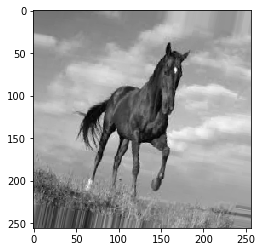

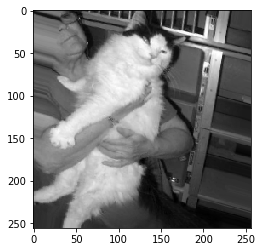

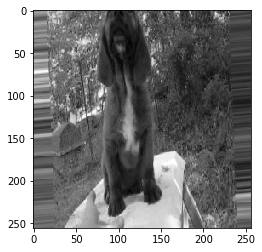

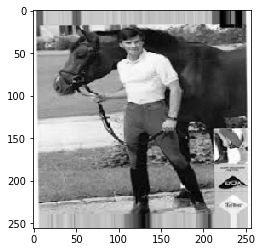

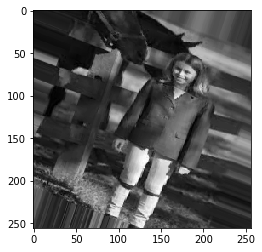

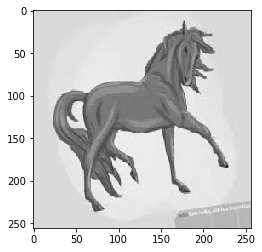

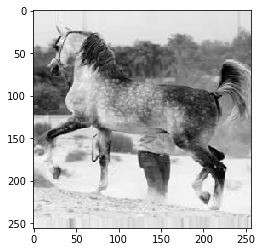

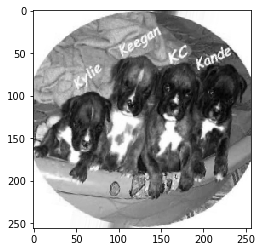

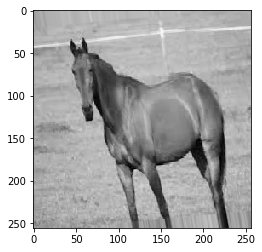

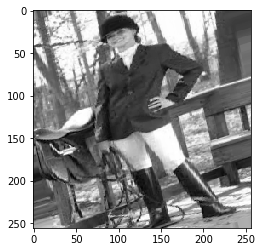

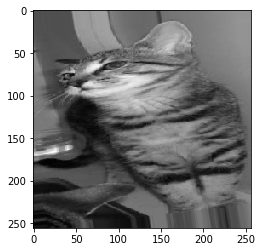

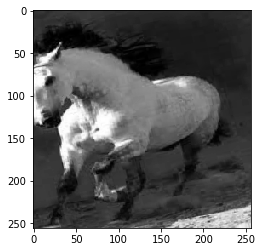

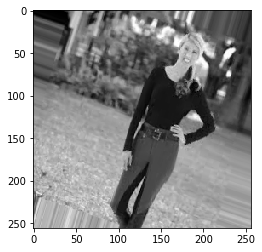

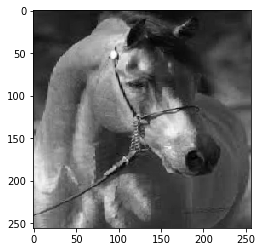

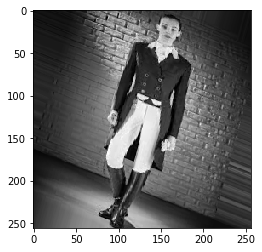

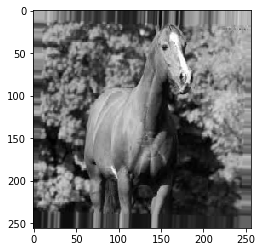

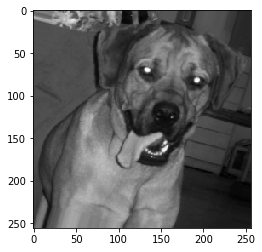

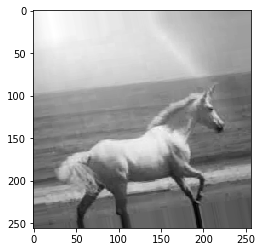

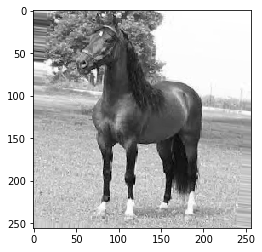

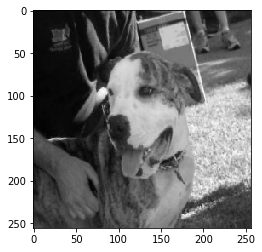

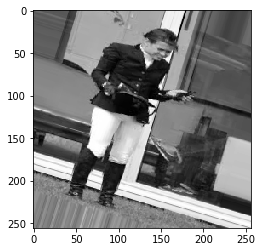

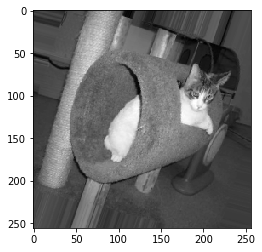

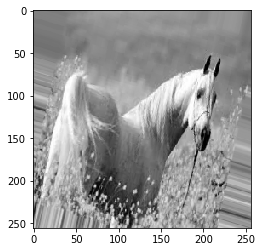

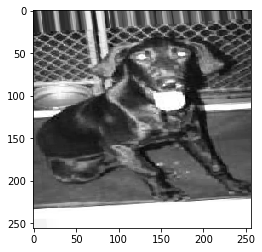

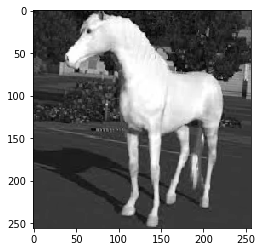

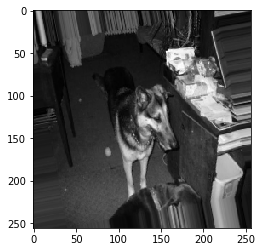

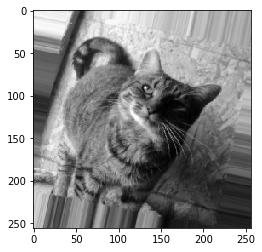

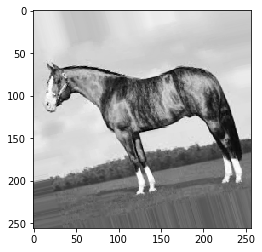

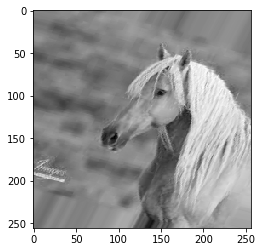

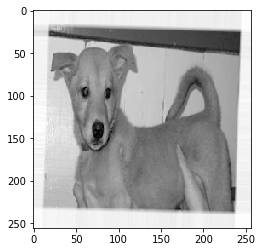

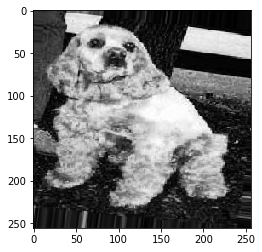

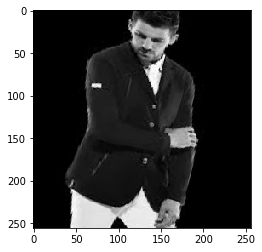

In [0]:
for image in images:
  img = image.reshape(256,256)
  plt.figure()
  plt.imshow(img, cmap="gray")

In [15]:
in_layer = Input(shape=[256, 256, 1])
layer_1 = Conv2D(32, (3,3), activation="relu")(in_layer)
layer_2 = MaxPool2D()(layer_1)
layer_3 = Conv2D(64, (3,3), activation="relu")(layer_2)
layer_4 = MaxPool2D()(layer_3)
drop = Dropout(.25)(layer_4)
layer_5 = Conv2D(128, (3,3), activation="relu")(drop)
layer_6 = MaxPool2D()(layer_5)
layer_7 = Conv2D(128, (3,3), activation="relu")(layer_6)
layer_8 = MaxPool2D()(layer_7)
layer_9 = Conv2D(128, (3,3), activation="relu")(layer_8)
layer_10 = MaxPool2D()(layer_9)

x = Conv2D(256, (3,3), activation="relu")(layer_10)
x = MaxPool2D()(x)



flatten = Flatten()(x)

d = Dense(1000, activation="relu")(flatten)
d2 = Dense(800, activation="relu")(d)
d3 = Dense(600, activation="relu")(d2)

d1 = Dense(400, activation="relu")(d3)
d2 = Dense(100, activation="relu")(d1)
d3 = Dense(50, activation="relu")(d2)
out = Dense(4, activation="softmax")(d3)

W0712 14:38:18.874998 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 14:38:18.909985 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 14:38:18.916860 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 14:38:18.943100 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 14:38:18.959030 139657630820224 deprecation_wrapp

In [0]:

model = Model(inputs=[in_layer], outputs=[out])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
__________

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

W0712 14:38:35.926774 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 14:38:35.952934 139657630820224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
hist = model.fit_generator(train_gen, epochs=10, steps_per_epoch=100, validation_data=test_gen, validation_steps=100)

W0712 14:38:36.697852 139657630820224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
100/100 [==============================] - 44s 441ms/step - loss: 1.5528 - acc: 0.2884 - val_loss: 1.1781 - val_acc: 0.4300
Epoch 2/10
100/100 [==============================] - 36s 362ms/step - loss: 1.1754 - acc: 0.4238 - val_loss: 1.1624 - val_acc: 0.4197
Epoch 3/10
100/100 [==============================] - 36s 362ms/step - loss: 1.0998 - acc: 0.4725 - val_loss: 1.0382 - val_acc: 0.5809
Epoch 4/10
100/100 [==============================] - 36s 361ms/step - loss: 0.9746 - acc: 0.5513 - val_loss: 0.8629 - val_acc: 0.6012
Epoch 5/10
100/100 [==============================] - 36s 361ms/step - loss: 0.9632 - acc: 0.5541 - val_loss: 0.7702 - val_acc: 0.6391
Epoch 6/10
100/100 [==============================] - 36s 364ms/step - loss: 0.8617 - acc: 0.6212 - val_loss: 0.8685 - val_acc: 0.6053
Epoch 7/10
100/100 [==============================] - 37s 367ms/step - loss: 0.7967 - acc: 0.6553 - val_loss: 0.7857 - val_acc: 0.6469
Epoch 8/10
100/100 [==============================] - 3

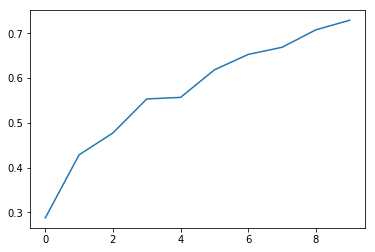

In [20]:
plt.plot(hist.history["acc"])

In [0]:
from keras.applications.resnet50 import ResNet50

In [38]:
gen = generator.flow_from_directory("data")

Found 808 images belonging to 4 classes.


In [39]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(256,256,3), classes=len(train_gen.class_indices))

for layer in base_model.layers:
  layer.trainable = False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
x = base_model.output
x = Flatten()(x)
# x = MaxPool2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
x = Dense(16, activation="relu")(x)
final = Dense(len(train_gen.class_indices), activation="softmax")(x)

In [0]:
model2 = Model(inputs=[base_model.input], outputs=[final])

In [56]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [58]:
model2.fit_generator(gen, epochs=10, steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 54s 541ms/step - loss: 8.2268 - acc: 0.4519
Epoch 2/10
100/100 [==============================] - 48s 477ms/step - loss: 8.1343 - acc: 0.4928
Epoch 3/10
100/100 [==============================] - 48s 481ms/step - loss: 8.0153 - acc: 0.5025
Epoch 4/10
100/100 [==============================] - 62s 617ms/step - loss: 8.0594 - acc: 0.4975
Epoch 5/10
100/100 [==============================] - 48s 480ms/step - loss: 7.6394 - acc: 0.5044
Epoch 6/10
100/100 [==============================] - 48s 476ms/step - loss: 0.4178 - acc: 0.9360
Epoch 7/10
100/100 [==============================] - 48s 476ms/step - loss: 0.0832 - acc: 0.9834
Epoch 8/10
100/100 [==============================] - 48s 478ms/step - loss: 0.0886 - acc: 0.9862
Epoch 9/10
100/100 [==============================] - 48s 483ms/step - loss: 0.0637 - acc: 0.9906
Epoch 10/10
100/100 [==============================] - 48s 478ms/step - loss: 0.0680 - acc: 0.9912


In [59]:
model2.evaluate_generator(gen, steps=10)

[0.3293682480314699, 0.9662162162162162]